**<h3><center>EN2550 Exercise 7 - Camera and Calibration</center></h3>**
*Name - Abeysinghe W.A.M.S.Y*
<br>
*Index no - 190014F*
<br>

All the imports are done at the beginning. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plyfile import PlyData, PlyElement # Open3d is the standard

**Q1**. Display the airplane.ply with the camera matrix P1 = [[1,0,0,0], [0,1,0,0], [0,0,0,-4000]] and a P2 to affect a rotation of 30◦ about the z-axis.

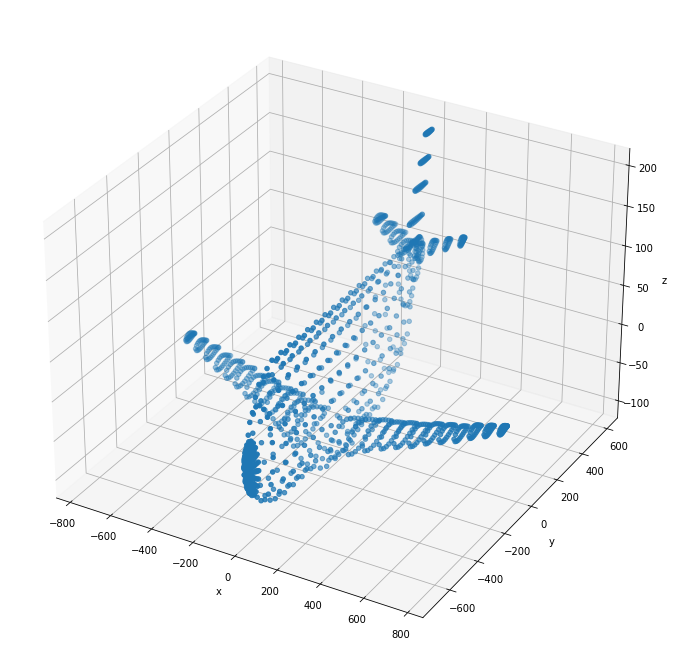

In [14]:
pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points = points-np.mean(points,axis=1).reshape(3,1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(points[0,:],points[1,:],points[2,:])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

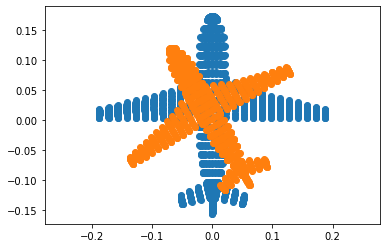

In [20]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)

R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P1=K @ np.concatenate((R,t),axis=1)


titz = 30*np.pi/180

R=np.array([[np.cos(titz),-np.sin(titz),0],[np.sin(titz),np.cos(titz),0],[0,0,1]])
K=np.array([[0.8,0,0],[0,0.8,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P2=K @ np.concatenate((R,t),axis=1)

x1=P1@X
x2=P2@X
x1=x1/x1[2,:]
x2=x2/x2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis("equal")

plt.show()

**Q2**. The following is a cameras matrix in the Hartley and Zisserman We know that P = KR[I|−C].Find the matrices K, R, and C.

**Q3**. Measure the are of the earrings, jewels, and the machine part in the given images.
Assume that the above images are a portion of an image acquired using a camera
with an the focal length f = 8 mm and the distant of the object plane form the camera
lens plane is Z = 720 mm and the pixel size of the image sensor is 2.2 μm×2.2 μm,
what is the size of the object? Draw bounding boxes.

Item  1 , area in pixels = 59143
ltem  1 , area in mmA2 = 2318.642172
Item  2 , area in pixels = 59211
ltem  2 , area in mmA2 = 2321.3080440000003


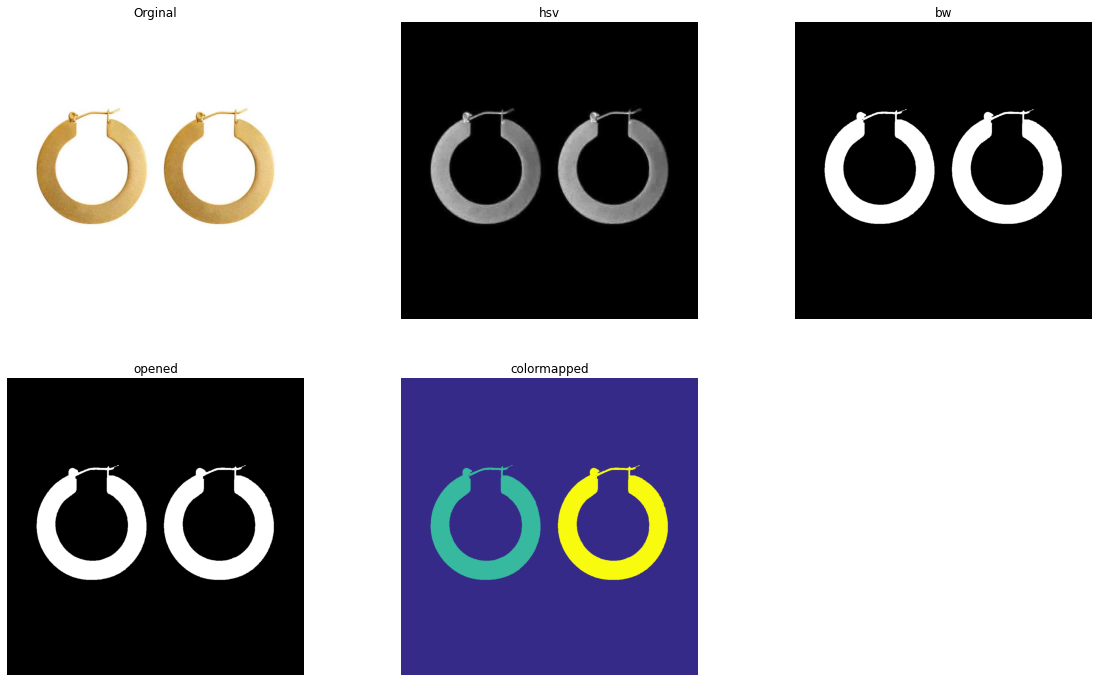

In [19]:
im = cv.imread(r'earrings.jpg', cv. IMREAD_COLOR)                                                 
assert im is not None                                                                                     
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)                                                                   
th, bw = cv.threshold(hsv[:,:, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)                               
# Remove dots in the object foregound using closing                                                       
w = 5                                                                                                     
kernel = np.ones((w,w), np.uint8)                                                                         
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)                                                      

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)                      
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)                     

Z = 720 # mm                                                                                               
f = 8 # mm                                                                                                 
for i, s in enumerate(stats):                                                                              
    if i != 0:                                                                                                 
        print('Item ', i, ', area in pixels =', s[4])                                                              
        print('ltem ', i, ', area in mmA2 =', s[4]*(2.2e-3)**2*(Z*Z)/(f*f))                                       


fig,ax=plt.subplots(2,3,figsize=(20,12))
ax[0,0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0,0].set_title("Orginal")

ax[0,1].imshow(cv.cvtColor(hsv[:, :, 1],cv.COLOR_BGR2RGB)) 
ax[0,1].set_title("hsv")

ax[0,2].imshow(cv.cvtColor(bw,cv.COLOR_BGR2RGB))
ax[0,2].set_title("bw")  

ax[1,0].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[1,0].set_title("opened")

ax[1,1].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)) 
ax[1,1].set_title("colormapped") 

[axi.set_axis_off() for axi in ax.ravel()]

plt.show()

**Q4**. If the same camera in 3 has been used to make the Allen keys image, measure the
width of each allen key. For this, we need to know the direction perpendicular to the
Allen keys. The code given below allows you to do that using Hough lines. Note that
when the Hough lines appear, you will have to draw a rectangle covering a horizontal
strip of the Allen keys.

(0, 0, 0, 0)


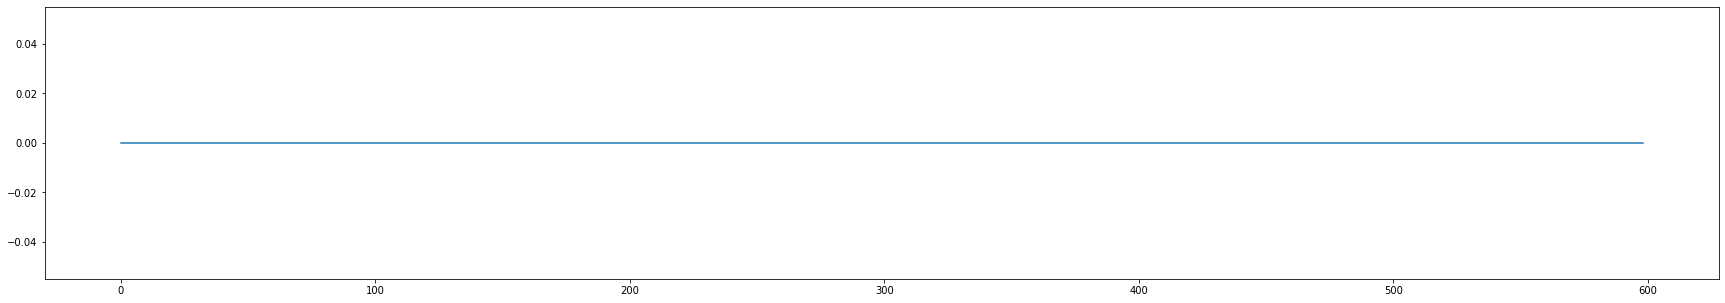

In [24]:
import cv2 as cv
import numpy as np
import matplotlib . pyplot as plt
file_name = 'allenkeys.jpg'
im = cv . imread(file_name , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv .Canny(im, 50, 150)

# Copy edges to the images that will display the results in BGR
canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)

lines = cv . HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)
if lines is not None :
    for i in range (0 , len (lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta )
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)) , int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
        cv.line(canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', canny)
cv.waitKey(0)
cv.imshow('Image', canny_color)
r = cv.selectROI('Image', canny_color, showCrosshair=True , fromCenter=False)
cv.waitKey(0)
print(r)

x0 , y0 = int (r[0] +r[2]/2) , int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[ : , 0 ,1]))
c = y0 = m*x0 # Inte r cept

cv.line(canny_color , (0 , int(c)) , (im.shape[0] , int(m*im.shape[0] +  c )) , (0 ,255 ,0) , 2 , cv.LINE_AA)

cv.imshow('Image', canny_color)
cv.waitKey(0)
cv.destroyAllWindows()

dy = 1
y_sub_pixel = np.arange(0 , im.shape[0] - 1 , dy )
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)
# https://youtu.be/v9CFu4r6tPY

# for i , y in enumerate(y_sub_pixel):
    # Your code hear to generate the pixel values along the line

fig, ax = plt.subplots(figsize =(30 ,5))
ax.plot(f_sub_pixel_nn )

#Your code hear to compute the widths. Keep in mind of the angle.

plt.show()